# Titanic - Experiment 10

### 1. Exploratory Data Analysis 
 1. Identify outliers, trends, and patterns
    1. Estimation of location (central tendency)
      - Median
      - Density plot (with a rug plot)
      - Q-Q plot
      - Bootstrap distribution of mean
      - Bootstrap distribution of 10% trimmed mean (from each end)
    2. Estimation of scale (spread)
      - Median absolute deviation
      - Interquartile range
      - Bootstrap distribution of standard deviation
      - Bootstrap distribution of median absolute deviation
### 2. Feature Engineering and Data Cleaning
 1. Add features
 2. Remove features
 3. Transform features
### 3. Modeling

Since the target variable is a label of either survived (1) or died (0), we need a binary classification model to help us identify which passengers survived or died the Titanic disaster.

In [1]:
# Import libraries
import os
import sys

import scipy
import numpy as np
import pandas as pd

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from IPython.core.interactiveshell import InteractiveShell

if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
from Titanic.Code.DataPrep.titanic import Titanic
from Titanic.Code.DataPrep.helpers import score_impute_strategies

warnings.filterwarnings('ignore')
np.random.seed(17)
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('fivethirtyeight')
%matplotlib inline

## 1. Exploratory Data Analysis

(891, 11)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

{'PassengerId': numpy.int32,
 'Survived': numpy.int32,
 'Pclass': numpy.int32,
 'Name': str,
 'Sex': CategoricalDtype(categories=['male', 'female'], ordered=None),
 'Age': numpy.float64,
 'SibSp': numpy.int32,
 'Parch': numpy.int32,
 'Ticket': str,
 'Fare': numpy.float64,
 'Cabin': str,
 'Embarked': CategoricalDtype(categories=['C', 'Q', 'S'], ordered=None)}

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


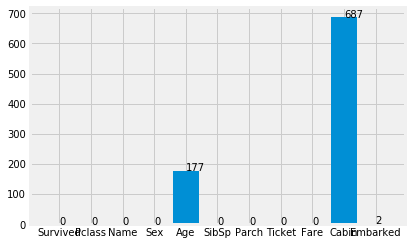

In [2]:
# Make training Titanic object
titanic = Titanic(name='train')

# Read training data
titanic.get_data()

# Print surface-level details about data
titanic.data.shape
titanic.data.columns
titanic.dtypes_
titanic.data.head()
titanic.plot_missing_data()

 * Our data has 11 columns and 891 rows (passengers).
 * **Age** contains 19.8% nulls.
 * **Cabin** contains 77.1% nulls.
 * **Embarked** contains 0.224% nulls.
 * **Name** has the title (Mr, Mrs, Miss, etc.) of the passenger.
 * **Ticket** looks like it does not contain any information of value.

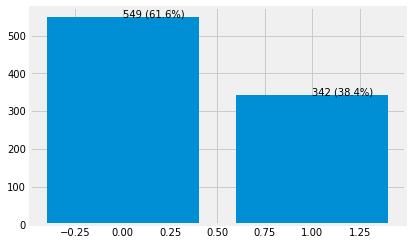

In [3]:
titanic.plot_value_counts(column='Survived')

 * A majority (61.6%) of passengers aboard the Titanic did not survive.

### 1.1 Analyze feature statistics
 1. Sex
 2. Pclass
 3. Age
 4. Name
 5. SibSp
 6. Parch
 7. Fare
 8. Embarked
 9. Cabin
 10. Ticket

#### 1.1.1 Sex
 - Sex of passenger
    - 'male'
    - 'female'

,Sex,Survived
0,male,0.188908
1,female,0.742038


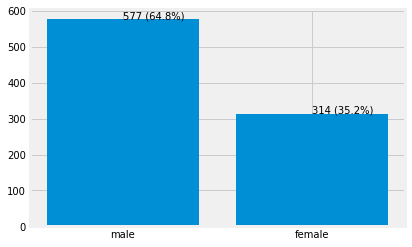

In [4]:
titanic.get_target_correlation('Sex')
titanic.plot_value_counts('Sex')

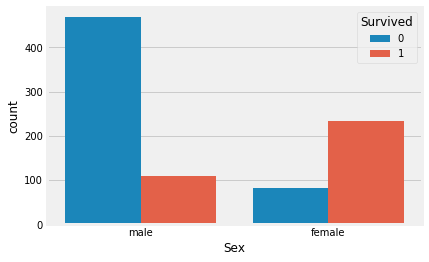

In [5]:
sns.countplot('Sex', hue='Survived', data=titanic.data)

In [6]:
pd.crosstab(
    titanic.data['Sex'],
    titanic.data['Survived'],
    normalize=True,
    margins=True
).style.background_gradient(
    cmap='Pastel1'
)
pd.crosstab(
    titanic.data['Sex'],
    titanic.data['Survived']
).style.background_gradient(
    cmap='Pastel1'
)

Survived,0,1,All
Sex,,,
male,0.525253,0.122334,0.647587
female,0.0909091,0.261504,0.352413
All,0.616162,0.383838,1


Survived,0,1
Sex,,
male,468,109
female,81,233


**Sex** shows us that, of the 38% passengers that survived: 26% were female and 12% were male. In addition, relative to their own sex population: female passengers had a 74% survival rate versus male passengers who had an 18% survival rate.

In contrast, of the 61% of passengers that died: 9% were female and 52% were male.

#### 1.1.2 Pclass
 - Ticket class - proxy for socio-economic status
    - 1 = 1st (upper)
    - 2 = 2nd (middle)
    - 3 = 3rd (lower)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


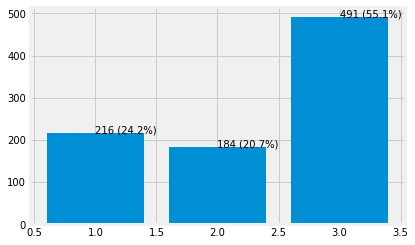

In [7]:
titanic.get_target_correlation('Pclass')
titanic.plot_value_counts('Pclass')

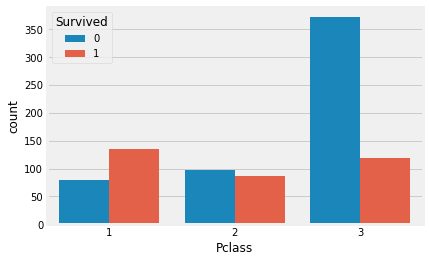

In [8]:
sns.countplot('Pclass', hue='Survived', data=titanic.data)

In [9]:
pd.crosstab(
    titanic.data['Pclass'],
    titanic.data['Survived'],
    normalize=True,
    margins=True
).style.background_gradient(
    cmap='Pastel1'
)
pd.crosstab(
    titanic.data['Pclass'],
    titanic.data['Survived']
).style.background_gradient(
    cmap='Pastel1'
)

Survived,0,1,All
Pclass,,,
1,0.0897868,0.152637,0.242424
2,0.108866,0.0976431,0.20651
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


**Pclass** shows us that higher socio-economic status increased the odds of survival, from 1st to 3rd the survival rates for each class were: 63%, 47%, and 24%, respectively.

Of the 38% of passengers that survived: 15% were 1st class, 10% were 2nd, and 13% were 3rd. While this seems to run to counter to what the survival rates for each class looked like, the death rates solidify the notion that higher class passengers had a better chance of survival; of the 61% of passengers that died: 9% were 1st class, 11% were 2nd, and 42% were 3rd.

#### 1.1.3 Age
 * Age in years - fractional if less than 1
    * If the age is estimated, it is in the form of xx.5

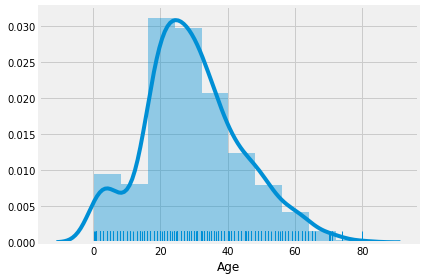

In [10]:
fig, ax = plt.subplots()
_, bin_edges = np.histogram(titanic.data[titanic.data['Age'].notnull()]['Age'])
sns.distplot(titanic.data[titanic.data['Age'].notnull()]['Age'], bins=bin_edges, rug=True, ax=ax)
plt.tight_layout()
plt.show()

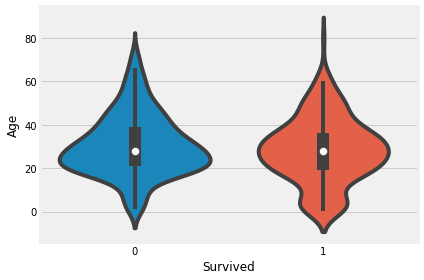

In [11]:
fig, ax = plt.subplots()
sns.violinplot(x='Survived', y='Age', data=titanic.data, ax=ax)
plt.tight_layout()
plt.show()

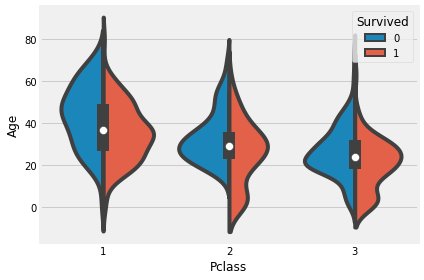

In [12]:
fig, ax = plt.subplots()
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic.data, split=True, ax=ax)
plt.tight_layout()
plt.show()

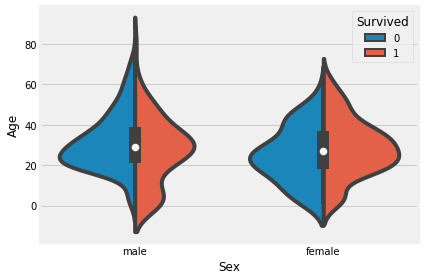

In [13]:
fig, ax = plt.subplots()
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic.data, split=True, ax=ax)
plt.tight_layout()
plt.show()

It looks like, in general, **Age** decreases with **Pclass** and the bumps we see on the lower portion of the violin plots shows that children in the 0 to 10 range had good survival, despite class and/or sex.

#### 1.1.4 Name
 * First name, last name, and title of passenger
    * {Last Name}, {Title} {First Name}

In [14]:
titanic.data['Name'].sample(20)

PassengerId
891                                  Dooley, Mr. Patrick
499      Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
665                          Lindqvist, Mr. Eino William
262                    Asplund, Master. Edvin Rojj Felix
717                        Endres, Miss. Caroline Louise
49                                   Samaan, Mr. Youssef
393                         Gustafsson, Mr. Johan Birger
362                            del Carlo, Mr. Sebastiano
496                                Yousseff, Mr. Gerious
143    Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...
650                      Stanley, Miss. Amy Zillah Elsie
793                              Sage, Miss. Stella Anna
839                                      Chip, Mr. Chang
596                          Van Impe, Mr. Jean Baptiste
652                                  Doling, Miss. Elsie
844                           Lemberopolous, Mr. Peter L
114                              Jussila, Miss. Katriina
471                

We can see from the sample of records above that there is a pattern of "NAME, TITLE". Therefore, let's extract the title from each passenger **Name** and analyze the resulting category.

In [15]:
titanic.extract_title()

In [16]:
titanic.get_target_correlation('Title')

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


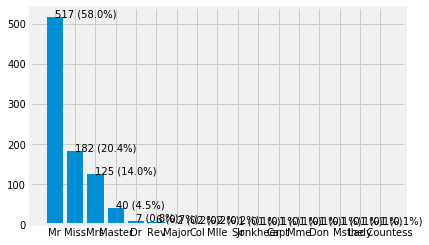

In [17]:
titanic.plot_value_counts('Title')

In [18]:
pd.crosstab(
    titanic.data['Sex'],
    titanic.data['Title']
).style.background_gradient()

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1


In [19]:
titanic.get_value_counts('Title')

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Jonkheer          1
Capt              1
Mme               1
Don               1
Ms                1
Lady              1
the Countess      1
Name: Title, dtype: int64

There is a long tail of titles from "Dr" all the way down to "Don". Let's regroup these into more general titles.

In [20]:
title_map = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Other',
    'Rev': 'Other',
    'Col': 'Other',
    'Major': 'Other',
    'Mlle': 'Miss',
    'the Countess': 'Mrs',
    'Mme': 'Miss',
    'Sir': 'Mr',
    'Jonkheer': 'Other',
    'Ms': 'Miss',
    'Capt': 'Other',
    'Lady': 'Mrs',
    'Don': 'Mr'
}

In [21]:
titanic.data['Title_New'] = titanic.data['Title'].map(title_map)
titanic.get_value_counts('Title_New')

Mr        519
Miss      186
Mrs       127
Master     40
Other      19
Name: Title_New, dtype: int64

It's not a perfect regrouping, but it makes more sense than the long tail we had before.

,Title_New,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.157996
3,Mrs,0.795276
4,Other,0.263158


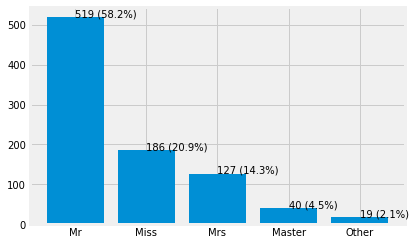

In [22]:
titanic.get_target_correlation('Title_New')
titanic.plot_value_counts('Title_New')

In [23]:
titanic.data.groupby('Title_New').mean()['Age']

Title_New
Master     4.574167
Miss      21.860000
Mr        32.428750
Mrs       35.981818
Other     46.222222
Name: Age, dtype: float64

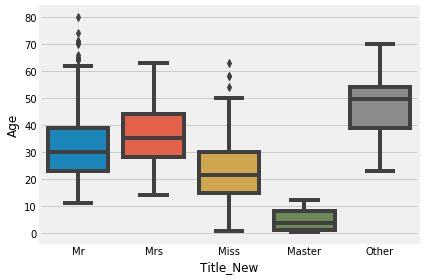

In [24]:
fig, ax = plt.subplots()
sns.boxplot(x='Title_New', y='Age', data=titanic.data, ax=ax)
plt.tight_layout()
plt.show()

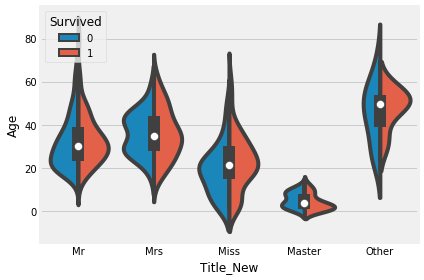

In [25]:
fig, ax = plt.subplots()
sns.violinplot(x='Title_New', y='Age', hue='Survived', data=titanic.data, split=True, ax=ax)
plt.tight_layout()
plt.show()

The plots above show that the new grouping makes sense and we could make the hypothesis that "Master" is a title given exclusively to children but does not represent the entire population of children passengers.

#### 1.1.5 SibSp
 * \# of siblings / spouses aboard the Titanic
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiances were ignored)

#### 1.1.6 Parch
 * \# of parents / children aboard the Titanic
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore Parch=0 for them

#### 1.1.7 Fare
 * Passenger fare

#### 1.1.8 Embarked
 * Port of Embarkation
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

#### 1.1.9 Cabin
 * Room where passenger stayed
    * Compound field where first alpha character designated the section of the ship and the following numbers was the room number
    * Essentially, it's the location of a passenger's room on the ship

#### 1.1.10 Ticket
 * Ticket number of passenger

## 2. Feature Engineering and Data Cleaning
 1. Add features
 2. Remove features
 3. Transform features

## 3. Modeling